# Diagnostic for Heart Disease using KNN classification
by Rosa Rezaei, Advitya Mittal, Ishraq Mostafa and Quincy Kuzyk

## Introduction

Heart disease is the second leading cause of death in Canada (Statistics Canada) and the leading cause of death in the United States of America, Canada’s nearest neighbor. The relatively broad term ‘heart disease’ can include a number of different health issues within the heart, including, but not limited to: coronary artery disease, congenital heart disease, arrhythmia, myocardial infarction and heart failure. This investigation’s aim is to figure out which variable in relation to a patient’s health can be best used to predict whether or not a patient will have heart disease or is at a high risk from it. The dataset that will be used for the investigation is the Cleveland Heart Disease Dataset. This dataset includes the medical data of 303 individuals from Cleveland Ohio. One of the variable columns in the dataset includes the diagnosis of heart disease in each patient. Whether they suffer from it or not as well as how severe their case may be. Each patient is assigned a number value from 0 to 4, 0 representing no heart disease, then 1 to 4 representing the presence of heart disease. The severity of the disease increases with the number. The aim of this investigation is to evaluate which observations from the Cleveland Heart Disease dataset are most closely related with the diagnosis of heart disease, with 0 representing no risk and any value above that representing risk of heart disease.

Attribute information:
1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholesterol in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by fluoroscopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversible defect
14. target : 0 = no risk; 1-4 = risk level


In [24]:
library(tidyverse)
library(caret)
library(ggplot2)
library(forcats)

## 1. Load Data

#### First we load the data set from Cleaveland Heart Disease Database from the web

In [25]:
heart_disease_data <- read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names = FALSE)
head(heart_disease_data)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


<span style="color:white">aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa</span> **Table 1**

## 2. Clean Data

#### We add column names

In [26]:
colnames(heart_disease_data) <- c('age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target')
head(heart_disease_data)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


<span style="color:white">aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa</span> **Table 2**

#### Then we remove any observations with missing values

In [27]:
heart_disease_data[heart_disease_data == "?"] <- NA
clean_heart <- na.omit(heart_disease_data)
sum(is.na(heart_disease_data))


head(clean_heart)

[1] 6

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


<span style="color:white">aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa</span> **Table 3**

#### Target has five levels of : 0, 1, 2, 3, 4 but we’re only interested in predicting a patient has heart disease or not, so our target labels will be:
#### 0 = No Disease
#### 1 = Disease
#### We will  change the integer variables “2”, “3”, and “4” to “1” in the target column, so only “0” and “1” variables remain.

In [28]:
clean_heart$target[clean_heart$target=="4"] <- "1" 
clean_heart$target[clean_heart$target=="3"] <- "1" 
clean_heart$target[clean_heart$target=="2"] <- "1"



head(clean_heart)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


<span style="color:white">aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa</span> **Table 4**

 #### Since target is the label we want to predict, we must change it to a factor. We also changed "ca" and "thal" to numerical variables because k-nn requires are predictors to be numerical.

In [29]:
clean_heart2 <- clean_heart %>%
mutate(target = as.factor(target)) %>%
mutate(thal = as.numeric(thal)) %>%
mutate(ca = as.numeric(ca))

head(clean_heart2)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


#### Now let's check to see how many levels our labels have. We should expect 2.

In [30]:
clean_heart2 %>% 
  select(target) %>% 
  unlist() %>% 
  levels()

[1] "0" "1"

<span style="color:white">aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa</span> **Table 5**

#### Now we must check to see the number of observations our data set contains for each of our class labels. This is important because unequal representation can lead to inaccurate predictions.

In [31]:
num_obs <- nrow(clean_heart2) 

 clean_heart2 %>% 
  group_by(target) %>% 
  summarize(n = n(),
            percentage = n() / num_obs * 100) 

target,n,percentage
<fct>,<int>,<dbl>
0,160,53.87205
1,137,46.12795


<span style="color:white">aaaaaaaaa</span> **Table 6**

#### Before we go further, we check to see the difference in values of the variables using str function. Significantly different values will influence our classification at varying degrees which will make our predications less accurate.

In [32]:
str(clean_heart2)

tibble [297 × 14] (S3: tbl_df/tbl/data.frame)
 $ age     : num [1:297] 63 67 67 37 41 56 62 57 63 53 ...
 $ sex     : num [1:297] 1 1 1 1 0 1 0 0 1 1 ...
 $ cp      : num [1:297] 1 4 4 3 2 2 4 4 4 4 ...
 $ trestbps: num [1:297] 145 160 120 130 130 120 140 120 130 140 ...
 $ chol    : num [1:297] 233 286 229 250 204 236 268 354 254 203 ...
 $ fbs     : num [1:297] 1 0 0 0 0 0 0 0 0 1 ...
 $ restecg : num [1:297] 2 2 2 0 2 0 2 0 2 2 ...
 $ thalach : num [1:297] 150 108 129 187 172 178 160 163 147 155 ...
 $ exang   : num [1:297] 0 1 1 0 0 0 0 1 0 1 ...
 $ oldpeak : num [1:297] 2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ slope   : num [1:297] 3 2 2 3 1 1 3 1 2 3 ...
 $ ca      : num [1:297] 0 3 2 0 0 0 2 0 1 0 ...
 $ thal    : num [1:297] 6 3 7 3 3 3 3 3 7 7 ...
 $ target  : Factor w/ 2 levels "0","1": 1 2 2 1 1 1 2 1 2 2 ...
 - attr(*, "na.action")= 'omit' Named int [1:6] 88 167 193 267 288 303
  ..- attr(*, "names")= chr [1:6] "88" "167" "193" "267" ...


#### Here we can see that age, trestbps, chol and thalach are greater values and hence the data will need to be standardized (below).

## 3. Splitting the data into training and test set

#### Next, we be partioning the data into a training (70%) and testing (30%) set using the caret package.  As previously mentioned, we will use the variable target as our class label. Using createDataPartition function we get the row numbers of data we should include in our training set.

In [33]:
set.seed(1)

training_rows <- clean_heart2 %>%
    select(target) %>%
    unlist() %>%
    createDataPartition(p = 0.70, list = FALSE)

#### Using the rows designated above, we use the slice function to create rows for the training set and testing set  

In [34]:
training_set <- clean_heart2 %>%
               slice(training_rows)

test_set <- clean_heart2 %>%
               slice(-training_rows)

head(training_set)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
53,1,4,140,203,1,2,155,1,3.1,3,0,7,1
57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


<span style="color:white">aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa</span> **Table 7**

#### Now we perform a data transformation to scale and centre our predictors. Scale transformation is only done on the training set to ensure that our test data does not influence any part of our model training, it is then applied to the train and test set seperately.

In [35]:
scale_transformer <- preProcess(clean_heart2, method = c("center", "scale")) 
training_set <- predict(scale_transformer, clean_heart2)
test_set <- predict(scale_transformer, test_set)
head(training_set)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.9346033,0.6899303,-2.2368535,0.74911571,-0.27597761,2.426332,1.008496,0.01746496,-0.695246,1.0671642,2.2603305,-0.7207596,0.6547723,0
1.3766051,0.6899303,0.8724078,1.59357687,0.74330055,-0.410757,1.008496,-1.81327350,1.433497,0.3811301,0.6426964,2.4742493,-0.8927134,1
1.3766051,0.6899303,0.8724078,-0.65831955,-0.35290426,-0.410757,1.008496,-0.89790427,1.433497,1.3244270,0.6426964,1.4092463,1.1706008,1
-1.9384088,0.6899303,-0.1640127,-0.09534545,0.05096067,-0.410757,-1.001728,1.63025836,-0.695246,2.0962153,2.2603305,-0.7207596,-0.8927134,0
-1.4964070,-1.4445416,-1.2004331,-0.09534545,-0.83369584,-0.410757,1.008496,0.97642320,-0.695246,0.2953758,-0.9749377,-0.7207596,-0.8927134,0
0.1611000,0.6899303,-1.2004331,-0.65831955,-0.21828262,-0.410757,-1.001728,1.23795726,-0.695246,-0.2191498,-0.9749377,-0.7207596,-0.8927134,0


<span style="color:white">aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa</span> **Table 8**

#### We summarize the training data set. The following tables show the number of observations of each case of target(risk), and the percentage as well. We also showed the mean of the predictor variables in another summary table.

In [36]:
num_obs <- nrow(training_set)
training_set %>% 
  group_by(target) %>% 
  summarize(n = n(),
            percentage = n() / num_obs * 100)

training_set_summary <- group_by(training_set, target) %>%
    summarize(mean_trestbps = mean(trestbps),
              mean_chol = mean(chol),
              mean_thalach = mean(thalach),
              mean_age = mean(age),
              mean_oldpeak = mean(oldpeak),
              number_of_observations = length(target))
training_set_summary

target,n,percentage
<fct>,<int>,<dbl>
0,160,53.87205
1,137,46.12795


target,mean_trestbps,mean_chol,mean_thalach,mean_age,mean_oldpeak,number_of_observations
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,-0.1417908,-0.07416534,0.3915132,-0.2097672,-0.3917302,160
1,0.1655951,0.08661645,-0.4572416,0.2449836,0.4574952,137


<span style="color:white">aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa</span> **Tables 9 & 10**

## 4. Choosing K

#### We will use cross-validation to choose the best K based on all predictors. Target is our class label.

In [37]:
X_train <- training_set %>% 
  select(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal) %>% 
  data.frame()

Y_train <- training_set %>% 
  select(target) %>% 
  unlist()

head(X_train)
head(Y_train)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.9346033,0.6899303,-2.2368535,0.74911571,-0.27597761,2.426332,1.008496,0.01746496,-0.695246,1.0671642,2.2603305,-0.7207596,0.6547723
2,1.3766051,0.6899303,0.8724078,1.59357687,0.74330055,-0.410757,1.008496,-1.81327350,1.433497,0.3811301,0.6426964,2.4742493,-0.8927134
3,1.3766051,0.6899303,0.8724078,-0.65831955,-0.35290426,-0.410757,1.008496,-0.89790427,1.433497,1.3244270,0.6426964,1.4092463,1.1706008
4,-1.9384088,0.6899303,-0.1640127,-0.09534545,0.05096067,-0.410757,-1.001728,1.63025836,-0.695246,2.0962153,2.2603305,-0.7207596,-0.8927134
5,-1.4964070,-1.4445416,-1.2004331,-0.09534545,-0.83369584,-0.410757,1.008496,0.97642320,-0.695246,0.2953758,-0.9749377,-0.7207596,-0.8927134
6,0.1611000,0.6899303,-1.2004331,-0.65831955,-0.21828262,-0.410757,-1.001728,1.23795726,-0.695246,-0.2191498,-0.9749377,-0.7207596,-0.8927134


target1 target2 target3 target4 target5 target6 
      0       1       1       0       0       0 
Levels: 0 1

<span style="color:white">aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa</span> **Table 11**

#### We  use c function to create a data frame ks with all the Ks we would like to try out and train control function passes on the additional information to the train function we use to train our classifier. Here we set the arguments to method = "cv"  which stands for cross-validation and number = 10 for 10-fold cross-validation.

#### To help assess accuracy of each k we pass train_control to the trControl function and adds this as an argument to the train function. We then visualize the accuracies of each k to help us choose k.

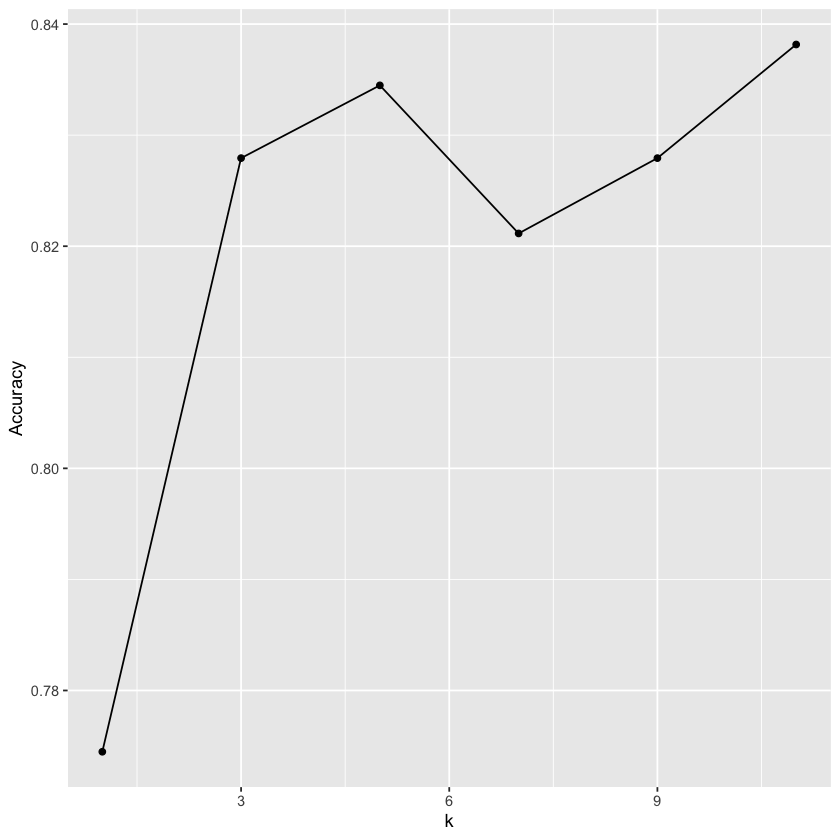

In [38]:
set.seed(4321) 

ks <- data.frame(k = c(1,3,5,7,9,11))
train_control <- trainControl(method = "cv", number = 10)



choose_k <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = ks ,trControl = train_control)

k_accuracies <- choose_k$results %>%
select(k, Accuracy)


choose_k_plot <- ggplot(k_accuracies, aes(x = k, y = Accuracy)) +
                          geom_point() +
                         geom_line()
choose_k_plot

<span style="color:white">aaaaaaaaaaaaaaaaaaaaaaaaasssssaaaaaaaaaaaaaaaaaaaaaaaaa</span> **Figure 1**

#### Based on our visualization above, k = 5 is the optimal k. We create our classifier, model_knn, using our training set .

In [39]:
k = data.frame(k = 5)

set.seed(9999)
model_knn <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k)
model_knn


k-Nearest Neighbors 

297 samples
 13 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 297, 297, 297, 297, 297, 297, ... 
Resampling results:

  Accuracy   Kappa    
  0.8000026  0.5965531

Tuning parameter 'k' was held constant at a value of 5

#### Now we predict labels in our training set and evaluate the training accuracy using confusionMatrix function. 

In [40]:
set.seed(9999) 

# your code here
predictions <- predict(model_knn, X_train)
training_results <- confusionMatrix(predictions, Y_train)
training_results
training_results$overall[1]

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 145  19
         1  15 118
                                          
               Accuracy : 0.8855          
                 95% CI : (0.8437, 0.9194)
    No Information Rate : 0.5387          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7692          
                                          
 Mcnemar's Test P-Value : 0.6069          
                                          
            Sensitivity : 0.9062          
            Specificity : 0.8613          
         Pos Pred Value : 0.8841          
         Neg Pred Value : 0.8872          
             Prevalence : 0.5387          
         Detection Rate : 0.4882          
   Detection Prevalence : 0.5522          
      Balanced Accuracy : 0.8838          
                                          
       'Positive' Class : 0               
                              

Accuracy 
0.8855219

## 5. Assessing our Model

#### We will test our classifier accuracy by using the test data set that has never been touched up until now. 

In [41]:
set.seed(4545)

X_test <- test_set %>% 
  select(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal) %>% 
  data.frame()

Y_test <- test_set %>% 
    select(target) %>% 
    unlist()

test_pred <- predict(model_knn, X_test)
test_results <- confusionMatrix(test_pred, Y_test)
test_results$overall[1]

Accuracy 
0.8651685

#### We find that the classifier accuracy after using the model on the test data is 86.5%

# Conclusion

Our project goal was to predict the danger of coronary illness in people using k-nn classification.
 
Firstly, we load and clean our chosen dataset(Cleveland Heart Disease Dataset) by assigning column names and removing observations with missing values.
Our final result variable, Target has 2 labels, namely 0 and 1, indicating risk and no risk respectively.
As k-nn requires predictors to be numerical , we change the “ca” and “thal” variable accordingly.
Using str functions, we find that age, trestbps, chol and thalach are greater values and hence the data needs to be standardized.
Next, we split our data into training and testing sets using caret package and create rows for both using slice function. 
We then perform a data transformation on our training set, and then applied to both the sets separately.
To choose the most accurate k, we perform cross-validation. Finally, we visualize accuracies of each k as shown in choose_k_plot and find k=5 to be the optimal choice.
Finally, using the training set, we create our classifier, model_knn.
We evaluate the training accuracy using confusionMatrix function, which is found to be Accuracy = 0.885521885521885 .
To assess our model, We test classifier accuracy, acting on our test data set.


The impact of our project could be life-saving. Patients can be diagnosed with risk of heart disease in a short time just from the data of the patients’ attributes. Further improvement on the overall functioning can make our predictions for the risk of heart disease even more accurate. This would not only allow the medical authority, but also the people at risk to be more cautious and aware about their health. After all, precaution is better than cure.

Further data collection and analysis could even make it possible to predict the level of risk of heart disease as well the type of heart disease. 
Besides guiding people to be able to keep better precaution, this can also help the Doctors in Diagnosing a fatal illness at an early stage.
